In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset (replace with your file path if necessary)
df = pd.read_csv('5flKr__A8bVZqr9RgLB3jyii8Wb1ioCScp_Mdp7llXc.csv')  # Replace with the path to your dataset


In [2]:
# 1. Handle Missing Values
# Check for missing values
print("Missing values:\n", df.isnull().sum())
# Drop rows with missing CustomerID, if it's critical for the analysis
df.dropna(subset=['CustomerID'], inplace=True)
# Fill other missing values, if any, with median (or use other strategies)
df.fillna(df.median(numeric_only=True), inplace=True)

Missing values:
 InvoiceNo              4
StockCode              4
Description         1545
Quantity               0
InvoiceDate            6
UnitPrice             11
CustomerID        145312
Country                9
CustomerAge            4
CustomerGender         4
dtype: int64


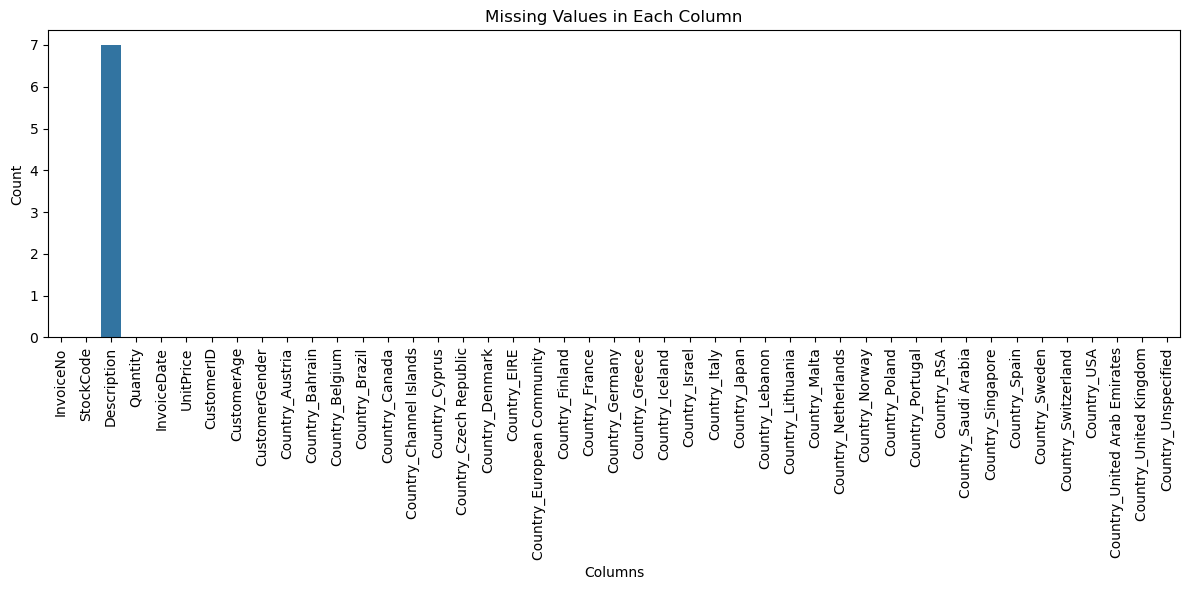

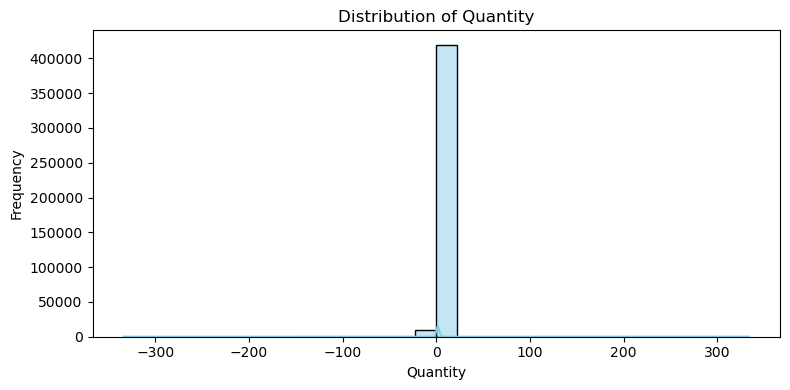

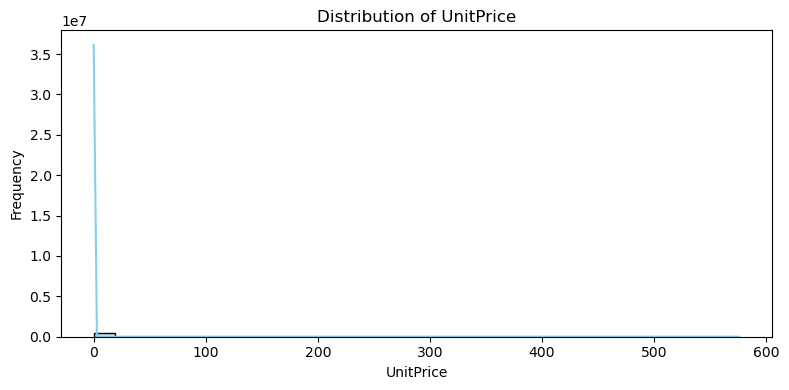

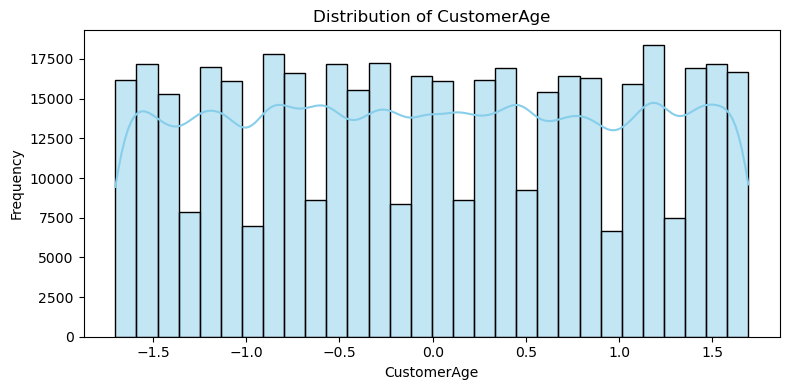

C:\Users\Nadeem\AppData\Local\Temp\ipykernel_19648\3361128872.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CustomerGender', palette='viridis')


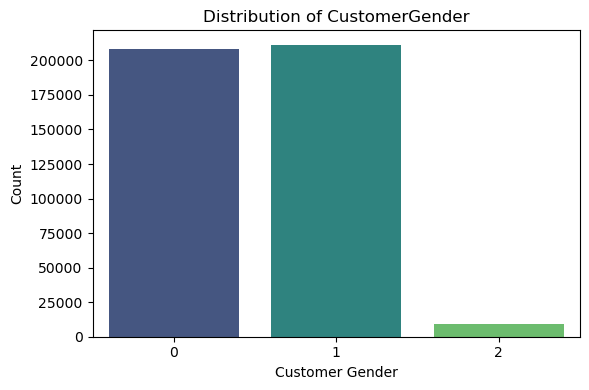

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_values = df.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values in Each Column')
plt.ylabel('Count')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

# Feature distributions
numeric_cols = ['Quantity', 'UnitPrice', 'CustomerAge']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# CustomerGender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='CustomerGender', palette='viridis')
plt.title('Distribution of CustomerGender')
plt.xlabel('Customer Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



In [3]:
# 2. Convert Data Types
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
# Ensure Quantity, UnitPrice, and CustomerAge are numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
df['CustomerAge'] = pd.to_numeric(df['CustomerAge'], errors='coerce')


In [5]:
# 4. Encoding Categorical Variables
# Encode CustomerGender and Country using LabelEncoder or OneHotEncoder
label_encoder = LabelEncoder()
df['CustomerGender'] = label_encoder.fit_transform(df['CustomerGender'])
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

# 5. Remove Duplicates
df.drop_duplicates(inplace=True)

# 6. Scaling
# Standardize Quantity, UnitPrice, and CustomerAge
scaler = StandardScaler()
df[['Quantity', 'UnitPrice', 'CustomerAge']] = scaler.fit_transform(
    df[['Quantity', 'UnitPrice', 'CustomerAge']]
)

In [8]:
# Convert InvoiceDate to datetime (ensure errors are handled)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Fill missing dates (NaT) with a default value (e.g., the earliest date in the dataset or the current date)
# Using the current date here for simplicity; you can choose a different strategy if needed
df['InvoiceDate'].fillna(pd.Timestamp('2020-01-01'), inplace=True)

# Convert InvoiceDate to timestamp (numeric)
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: x.timestamp())

# Now proceed with the rest of the features and target variable selection
X = df[['Quantity', 'UnitPrice', 'InvoiceDate', 'CustomerAge']]  # Features
y = df['CustomerGender']  # Target variable (gender)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Nadeem\AppData\Local\Temp\ipykernel_19648\2660518599.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['InvoiceDate'].fillna(pd.Timestamp('2020-01-01'), inplace=True)


In [10]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 InvoiceNo                       0
StockCode                       0
Description                     7
Quantity                        0
InvoiceDate                     0
UnitPrice                       0
CustomerID                      0
CustomerAge                     0
CustomerGender                  0
Country_Austria                 0
Country_Bahrain                 0
Country_Belgium                 0
Country_Brazil                  0
Country_Canada                  0
Country_Channel Islands         0
Country_Cyprus                  0
Country_Czech Republic          0
Country_Denmark                 0
Country_EIRE                    0
Country_European Community      0
Country_Finland                 0
Country_France                  0
Country_Germany                 0
Country_Greece                  0
Country_Iceland                 0
Country_Israel                  0
Country_Italy                   0
Country_Japan                   0
Country_Lebanon                

In [13]:
# Make copies of the original DataFrames for filling missing values
X_train_filled = X_train.copy()
X_test_filled = X_test.copy()

# Identifying categorical and numerical columns from X_train_filled
categorical_cols = X_train_filled.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train_filled.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values for categorical columns with the mode
for col in categorical_cols:
    mode = X_train_filled[col].mode()[0]  # Mode can return multiple values, so we select the first one
    X_train_filled[col] = X_train_filled[col].fillna(mode)
    X_test_filled[col] = X_test_filled[col].fillna(mode)

# Assuming missing values in numerical columns are already filled
# Now re-check for missing values to ensure all have been filled correctly
missing_values_train_filled_corrected = X_train_filled.isnull().sum().sum()
missing_values_test_filled_corrected = X_test_filled.isnull().sum().sum()

missing_values_train_filled_corrected, missing_values_test_filled_corrected


(0, 0)

In [15]:
# Filling missing values with the median of each column in the training set
X_train_filled = X_train.fillna(X_train.median())

# Applying the same transformation to the testing set
X_test_filled = X_test.fillna(X_train.median())

# Re-checking for missing values to ensure they have been filled
missing_values_train_filled = X_train_filled.isnull().sum().sum()
missing_values_test_filled = X_test_filled.isnull().sum().sum()

missing_values_train_filled, missing_values_test_filled


(0, 0)

In [17]:
# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for distance-based models like KNN)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize KNN and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' or 'macro' based on your use case
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8225768845158432
Precision: 0.8222020491078013
Recall: 0.8225768845158432
F1 Score: 0.8222435578436563
Confusion Matrix:
 [[34550  6976   207]
 [ 7107 34953   197]
 [  407   325  1056]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tqdm import tqdm
import numpy as np

# Install tqdm if not installed: pip install tqdm

# Train-test split (already done in your existing code, but ensuring correctness here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Progress bar helper for training Random Forest
class ProgressRandomForest(RandomForestClassifier):
    def fit(self, X, y, sample_weight=None):
        self.n_estimators_progress_bar = tqdm(range(self.n_estimators), desc="Training Random Forest")
        super().fit(X, y, sample_weight)
        self.n_estimators_progress_bar.close()
        return self

    def _parallel_build_trees(self, *args, **kwargs):
        tree = super()._parallel_build_trees(*args, **kwargs)
        self.n_estimators_progress_bar.update(1)
        return tree

# Train Random Forest with progress bar
rf_clf = ProgressRandomForest(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# Predictions
rf_pred = rf_clf.predict(X_test)

# Evaluation Metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print("\n--- Random Forest Results ---")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


Training Random Forest:   0%|                                                                  | 0/100 [00:14<?, ?it/s]



--- Random Forest Results ---
Accuracy: 0.9417799435752757
Precision: 0.9418362813209065
Recall: 0.9417799435752757
F1 Score: 0.9416945469402995
Confusion Matrix:
 [[39394  2304    35]
 [ 2311 39920    26]
 [  172   146  1470]]


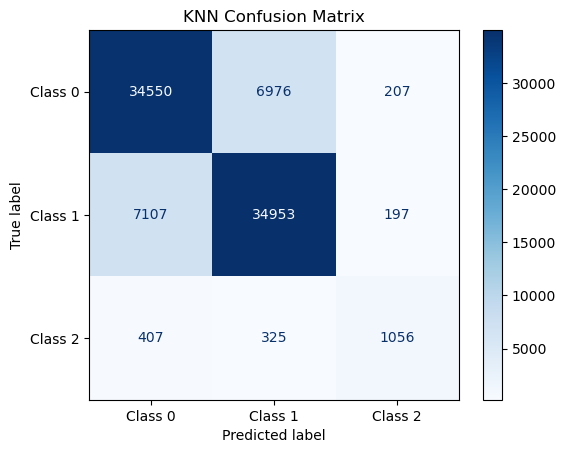

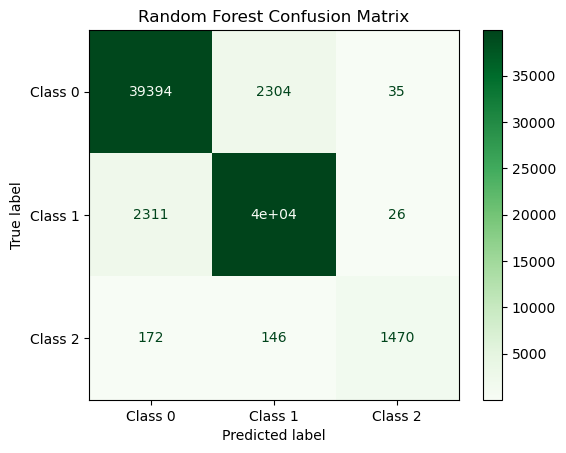

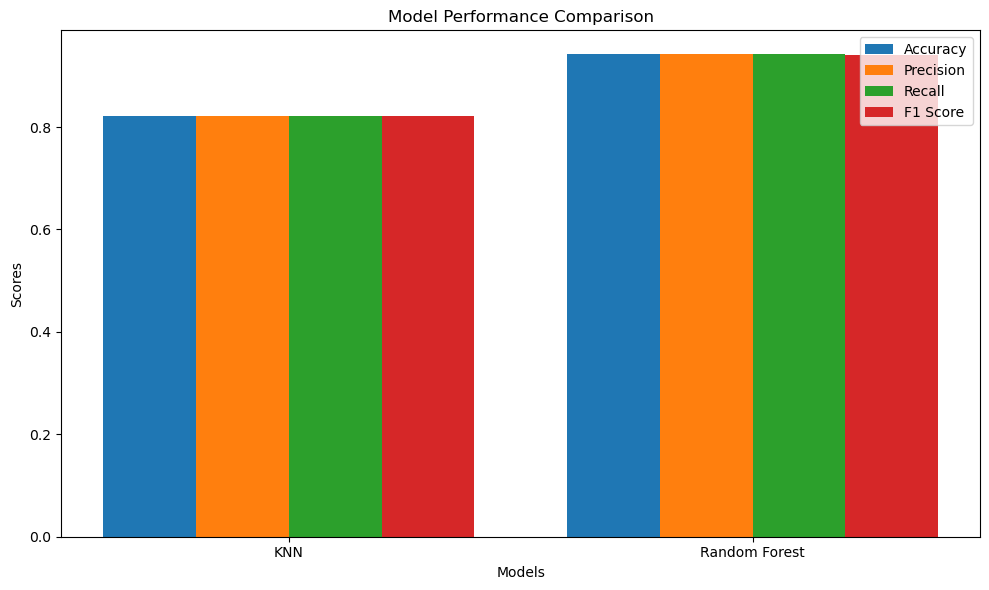

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# KNN Metrics
knn_accuracy = accuracy
knn_precision = precision
knn_recall = recall
knn_f1 = f1
knn_cm = cm

# Random Forest Metrics
rf_accuracy = rf_accuracy
rf_precision = rf_precision
rf_recall = rf_recall
rf_f1 = rf_f1
rf_cm = confusion_matrix(y_test, rf_pred)

# Visualize KNN Confusion Matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=['Class 0', 'Class 1', 'Class 2'])
disp_knn.plot(cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()

# Visualize Random Forest Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['Class 0', 'Class 1', 'Class 2'])
disp_rf.plot(cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Performance Comparison
models = ['KNN', 'Random Forest']
accuracies = [knn_accuracy, rf_accuracy]
precisions = [knn_precision, rf_precision]
recalls = [knn_recall, rf_recall]
f1_scores = [knn_f1, rf_f1]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, accuracies, width, label='Accuracy')
rects2 = ax.bar(x, precisions, width, label='Precision')
rects3 = ax.bar(x + width, recalls, width, label='Recall')
rects4 = ax.bar(x + 2 * width, f1_scores, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


# End